In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import re
import seaborn as sns


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
driver = webdriver.Chrome()
# Setting the driver to only get pitcher stats
driver.get("https://www.mlb.com/stats/pitching?sortState=asc")


In [3]:
cont = 0
player_count = 0
temp_head = []
temp_stats = []

for n in range(1, 3+1):
    print(f"Searching page: {n}")
    if n == 1:
        print("Inside the if")
        driver.get(f"https://www.mlb.com/stats/pitching?sortState=asc")
        sleep(random.randint(1, 15+1))
        for i in driver.find_elements(By.TAG_NAME, "tr"):
            if cont <= 0:
                temp_head.append(i.text)
                cont += 1
            else:
                temp_stats.append(i.text)
        print(f"Done getting information from the page {n}")
    else:
        print("Inside the elif")
        driver.get(f"https://www.mlb.com/stats/pitching?page={n}&sortState=asc")
        sleep(random.randint(1, 15+1))
        for i in driver.find_elements(By.TAG_NAME, "tr"):
            if cont == 0:
                temp_head.append(i.text)
            if cont != 0:
                temp_stats.append(i.text)
                cont += 1
        print(f"Done getting information from the page {n}")
    print(f"Finished searching in page {n}")
    cont = 1


Searching page: 1
Inside the if
Done getting information from the page 1
Finished searching in page 1
Searching page: 2
Inside the elif
Done getting information from the page 2
Finished searching in page 2
Searching page: 3
Inside the elif
Done getting information from the page 3
Finished searching in page 3


In [4]:
df_head = [item for sublist in temp_head for item in sublist.split('\n')]
df_head.insert(0, "no")
df_head.insert(2, "POS")
print(df_head)


['no', 'PLAYER', 'POS', 'TEAM', 'W', 'L', 'ERA', 'G', 'GS', 'CG', 'SHO', 'SV', 'SVO', 'IP', 'H', 'R', 'ER', 'HR', 'HB', 'BB', 'SO', 'WHIP', 'AVG']


In [5]:
pitcher_stats = []
temp_lst = []

for player in temp_stats:
    temp = player.split("\n")
    # print(temp)
    cont = 0
    for i in temp:
        # print(f"Test FOR\n{i}\n---------------\n")
        if cont == 3:
            # print("Cont == 3")
            clean_stats = i.split(" ")
            for stat in clean_stats:
                temp_lst.append(stat)
                cont = 0
            pitcher_stats.append(temp_lst)
            temp_lst = []
        else:
            temp_lst.append(i)
            cont += 1

print(pitcher_stats)


[['1', 'BlakeSnell', 'P', 'SD', '9', '8', '2.63', '24', '24', '0', '0', '0', '0', '130.0', '91', '40', '38', '13', '2', '76', '171', '1.28', '.196'], ['2', 'NathanEovaldi', 'P', 'TEX', '11', '3', '2.69', '19', '19', '2', '1', '0', '0', '123.2', '91', '38', '37', '8', '4', '34', '111', '1.01', '.208'], ['3', 'GerritCole', 'P', 'NYY', '10', '3', '2.76', '25', '25', '1', '1', '0', '0', '156.1', '122', '50', '48', '15', '7', '42', '166', '1.05', '.214'], ['4', 'JustinSteele', 'P', 'CHC', '13', '3', '2.79', '22', '22', '0', '0', '0', '0', '126.0', '120', '50', '39', '10', '6', '28', '120', '1.17', '.248'], ['5', 'SonnyGray', 'P', 'MIN', '6', '5', '3.04', '24', '24', '0', '0', '0', '0', '136.1', '119', '47', '46', '5', '3', '47', '140', '1.22', '.232'], ['6', 'KevinGausman', 'P', 'TOR', '9', '6', '3.04', '23', '23', '0', '0', '0', '0', '139.0', '124', '52', '47', '14', '2', '34', '183', '1.14', '.236'], ['7', 'MerrillKelly', 'P', 'AZ', '9', '5', '3.05', '21', '21', '0', '0', '0', '0', '124.0

In [9]:
pitcher_stats = [sublist for sublist in pitcher_stats if len(sublist) != 4]
pitcher_stats = [[item for item in sublist if item not in ('AVG')] for sublist in pitcher_stats]

for x in pitcher_stats:
    if len(x) != 23:
        print(f"The len is {len(x)}\nPlayer {x} is wrong")

In [10]:
pitcher_df = pd.DataFrame(columns=df_head,
                         data=pitcher_stats)
pitcher_df.drop(columns=["no"], inplace=True)


In [11]:
driver.close()

In [13]:
pitcher_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   PLAYER  62 non-null     object
 1   POS     62 non-null     object
 2   TEAM    62 non-null     object
 3   W       62 non-null     object
 4   L       62 non-null     object
 5   ERA     62 non-null     object
 6   G       62 non-null     object
 7   GS      62 non-null     object
 8   CG      62 non-null     object
 9   SHO     62 non-null     object
 10  SV      62 non-null     object
 11  SVO     62 non-null     object
 12  IP      62 non-null     object
 13  H       62 non-null     object
 14  R       62 non-null     object
 15  ER      62 non-null     object
 16  HR      62 non-null     object
 17  HB      62 non-null     object
 18  BB      62 non-null     object
 19  SO      62 non-null     object
 20  WHIP    62 non-null     object
 21  AVG     62 non-null     object
dtypes: object(22)
memory usage: 

In [14]:
pitcher_df = pitcher_df.astype({
    "POS": 'category',
    "TEAM": 'category',
    'W': "int", 
    'L': "int", 
    'ERA': "float", 
    'G': "int", 
    'GS': "int", 
    'CG': "int", 
    'SHO': "int", 
    'SV': "int", 
    'SVO': "int", 
    'IP': "float", 
    'H': "int", 
    'R': "int", 
    'ER': "int", 
    'HR': "int", 
    'HB': "int", 
    'BB': "int", 
    'SO': "int", 
    'WHIP': "float", 
    'AVG': "float"
})
pitcher_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   PLAYER  62 non-null     object  
 1   POS     62 non-null     category
 2   TEAM    62 non-null     category
 3   W       62 non-null     int64   
 4   L       62 non-null     int64   
 5   ERA     62 non-null     float64 
 6   G       62 non-null     int64   
 7   GS      62 non-null     int64   
 8   CG      62 non-null     int64   
 9   SHO     62 non-null     int64   
 10  SV      62 non-null     int64   
 11  SVO     62 non-null     int64   
 12  IP      62 non-null     float64 
 13  H       62 non-null     int64   
 14  R       62 non-null     int64   
 15  ER      62 non-null     int64   
 16  HR      62 non-null     int64   
 17  HB      62 non-null     int64   
 18  BB      62 non-null     int64   
 19  SO      62 non-null     int64   
 20  WHIP    62 non-null     float64 
 21  AVG     62 non-nul

In [15]:
pitcher_df.to_csv("pitcher_stats.csv", index=False)

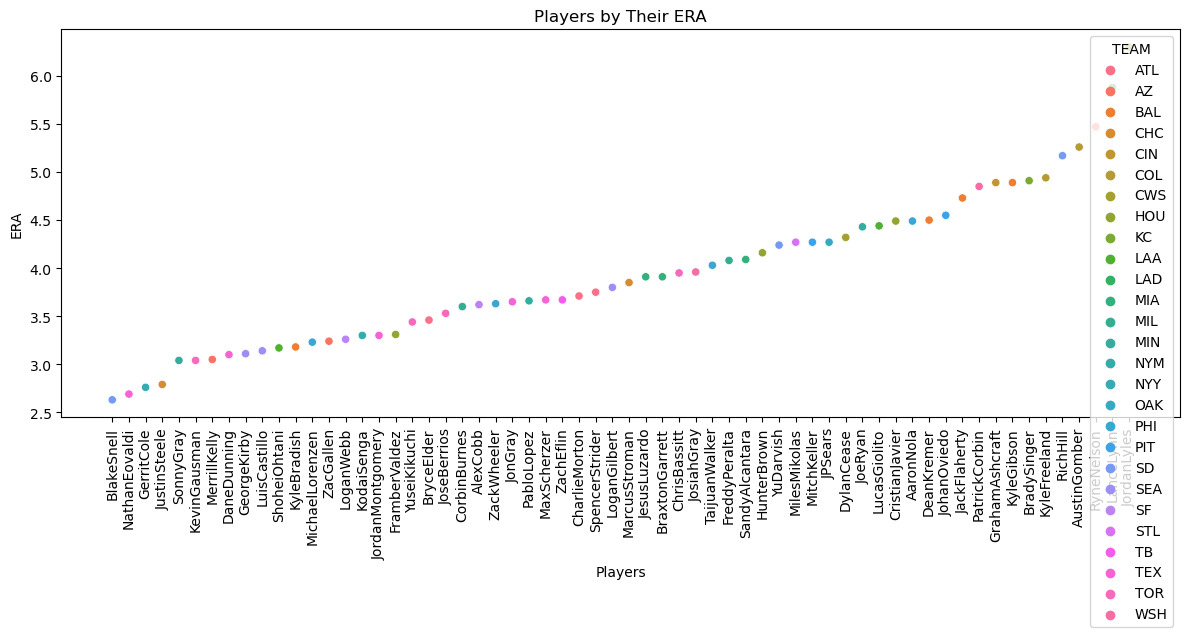

In [16]:
# Setting the plot size
plt.figure(figsize=(12, 6))

# Scatter plot to visualize players by their ERA
sns.scatterplot(x='PLAYER', y='ERA', data=pitcher_df, hue='TEAM')

# Adding labels and title
plt.xlabel('Players')
plt.ylabel('ERA')
plt.title('Players by Their ERA')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()


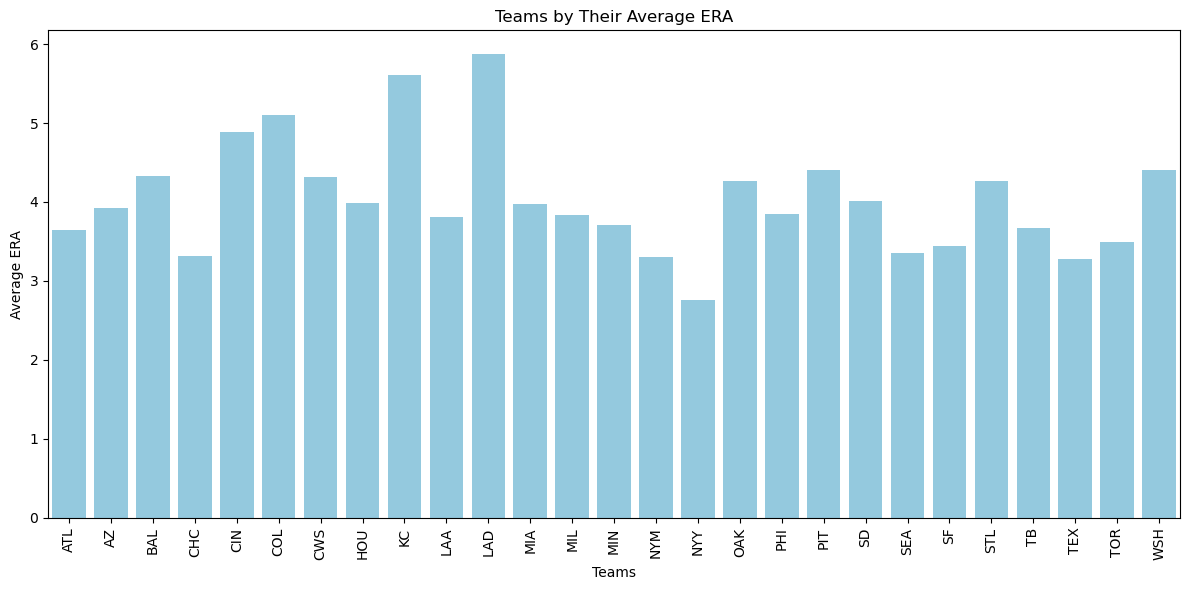

In [18]:
team_era_stats = pitcher_df.groupby('TEAM')['ERA'].mean().reset_index()


# Setting the plot size
plt.figure(figsize=(12, 6))

# Bar plot to visualize the average ERA of the teams
sns.barplot(x='TEAM', y='ERA', data=team_era_stats, color='skyblue')

# Adding labels and title
plt.xlabel('Teams')
plt.ylabel('Average ERA')
plt.title('Teams by Their Average ERA')
plt.xticks(rotation=90)
plt.tight_layout()

# Displaying the plot
plt.show()
